In [ ]:
# Import the requests library for making HTTP requests
import requests

# Import the BeautifulSoup library for web scraping and parsing HTML
from bs4 import BeautifulSoup

# Import the pandas library for data manipulation and analysis
import pandas as pd

# Import the pyplot module of the matplotlib library for data visualization
import matplotlib.pyplot as plt

# Import the NumPy library for numerical computing with Python
import numpy as np

# Import the random module for generating random numbers
import random

In [ ]:
# URL of the web page to scrape
url = 'https://www.basketball-reference.com/leagues/NBA_2023_totals.html'

# Send an HTTP request to the URL
response = requests.get(url)

# Parse the HTML content of the page with BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Find the HTML table containing the player stats and extract the rows
table = soup.find('table', {'id': 'totals_stats'})
rows = table.find_all('tr')

# Initialize an array to store the total points for each age group
age_groups_players = np.zeros(50, dtype=int)

# Iterate over the rows in the table (skipping the header row)
for row in rows[1:]:
    # Check that the row has at least 29 columns
    if len(row.find_all('td')) >= 29:
        # Extract the player's age as an integer
        age = int(row.find_all('td')[2].text)
        
        # Extract the player's total points as an integer
        points = int(row.find_all('td')[28].text)
        
        # Add the player's points to the corresponding age group
        age_groups_players[age] += points

# Print the total points for each age group
for age, points in enumerate(age_groups_players):
    if points > 0:
        print(f"Age {age}: {points}")

Age 19: 5273
Age 20: 12074
Age 21: 19359
Age 22: 23279
Age 23: 32731
Age 24: 32112
Age 25: 25340
Age 26: 30277
Age 27: 25387
Age 28: 20270
Age 29: 15388
Age 30: 18423
Age 31: 9753
Age 32: 15255
Age 33: 7928
Age 34: 13134
Age 35: 2272
Age 36: 3384
Age 37: 1253
Age 38: 1590
Age 39: 17
Age 42: 27


In [ ]:
# URL of the web page to scrape
url = 'https://www.basketball-reference.com/leagues/NBA_2023_totals.html'

# Send an HTTP request to the URL
response = requests.get(url)

# Parse the HTML content of the page with BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Find the HTML table containing the player stats and extract the rows
table = soup.find('table', {'id': 'totals_stats'})
rows = table.find_all('tr')

# Initialize arrays to store the total points and number of players for each age group
age_groups_points = np.zeros(50, dtype=int)
age_groups_players = np.zeros(50, dtype=int)

# Iterate over the rows in the table (skipping the header row)
for row in rows[1:]:
    # Check that the row has at least 29 columns
    if len(row.find_all('td')) >= 29:
        # Extract the player's age as an integer
        age = int(row.find_all('td')[2].text)
        
        # Extract the player's total points as an integer
        points = int(row.find_all('td')[28].text)
        
        # Add the player's points and increment the player count for the corresponding age group
        age_groups_points[age] += points
        age_groups_players[age] += 1

# Compute the average points for each age group and print the results
max_age = 0
max_avg_points = 0
for age in range(len(age_groups_points)):
    if age_groups_players[age] > 0:
        avg_points = age_groups_points[age] / age_groups_players[age]
        print(f"Age {age}: {avg_points:.1f} points per player ({age_groups_players[age]} players)")
        if avg_points > max_avg_points:
            max_avg_points = avg_points
            max_age = age

Age 19: 376.6 points per player (14 players)
Age 20: 402.5 points per player (30 players)
Age 21: 395.1 points per player (49 players)
Age 22: 423.3 points per player (55 players)
Age 23: 389.7 points per player (84 players)
Age 24: 509.7 points per player (63 players)
Age 25: 383.9 points per player (66 players)
Age 26: 593.7 points per player (51 players)
Age 27: 507.7 points per player (50 players)
Age 28: 633.4 points per player (32 players)
Age 29: 404.9 points per player (38 players)
Age 30: 558.3 points per player (33 players)
Age 31: 487.6 points per player (20 players)
Age 32: 610.2 points per player (25 players)
Age 33: 466.4 points per player (17 players)
Age 34: 525.4 points per player (25 players)
Age 35: 252.4 points per player (9 players)
Age 36: 282.0 points per player (12 players)
Age 37: 417.7 points per player (3 players)
Age 38: 1590.0 points per player (1 players)
Age 39: 17.0 points per player (1 players)
Age 42: 27.0 points per player (1 players)


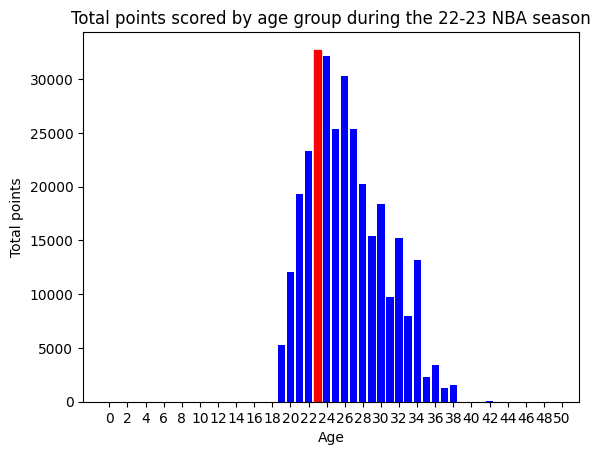

Players age 38 scored the highest average points (1590.0 points per player).


In [ ]:
# Create a bar graph of the total points for each age group
plt.bar(range(50), age_groups_points, color='blue')

max_value = max(age_groups_points)

# Iterate over each bar in the chart
for i in range(len(age_groups_points)):
    # If the bar's height matches the highest value
    if age_groups_points[i] == max_value:
        # Set its color to red
        plt.gca().get_children()[i].set_color('red')

# Add labels and title to the graph
plt.xlabel('Age')
plt.ylabel('Total points')
plt.title('Total points scored by age group during the 22-23 NBA season')

# Highlight the age group with the highest average points
#plt.bar(max_age, age_groups_points[max_age], color='red')

# Set the x-ticks
plt.xticks(np.arange(0, 52, 2))

# Show the graph
plt.show()


# Print the age group that scores the highest average points
print(f"Players age {max_age} scored the highest average points ({max_avg_points:.1f} points per player).")